In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Leitura do dataSet

In [3]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education.num',
    'marital.status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital.gain',
    'capital.loss',
    'hours.per.week',
    'native.country',
    'income',
]


In [4]:
data = pd.read_csv("../adult.data", names=names, header=None) #header=None

In [5]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# Features data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Checando por valores nulos
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [8]:
# Checando valores ?
round((data.isin(['?']).sum() / data.shape[0])
      * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

#### Exploração de dados

In [9]:
# Linhas X Colunas
print(data.shape)

(32561, 15)


In [10]:
# Resuma a distribuição da classe renda (income)
target = data.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Classe = %s, Count = %d, Porcentagem = %.3f%%' % (k, v, per))

Classe =  <=50K, Count = 24720, Porcentagem = 75.919%
Classe =  >50K, Count = 7841, Porcentagem = 24.081%


<AxesSubplot:xlabel='count', ylabel='occupation'>

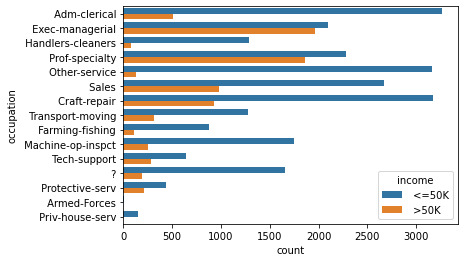

In [11]:
#frequências de cada classe, em relação ao alvo do nosso classificador
# usando a ocupação
sns.countplot(y='occupation', hue='income', data=data,)

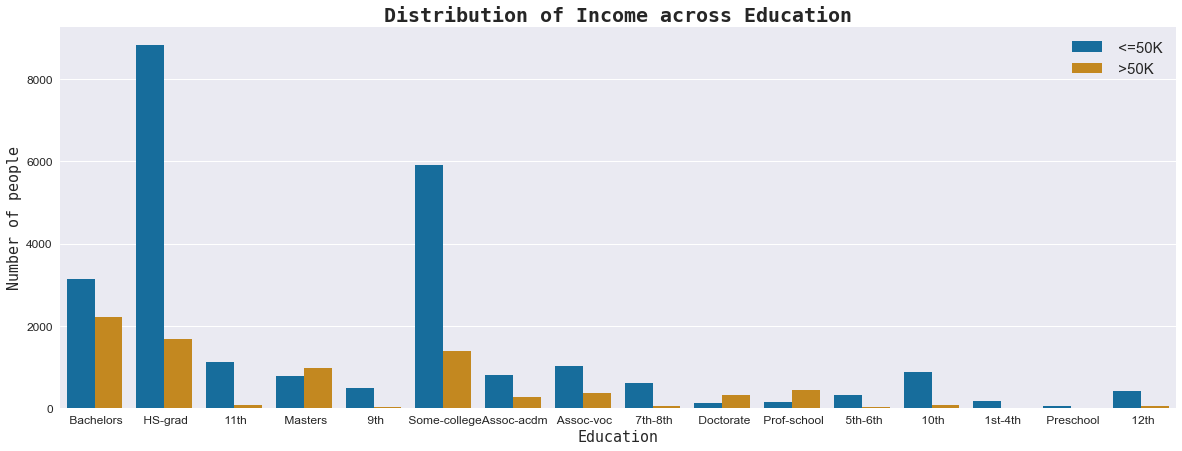

In [12]:
#frequências de cada classe, em relação ao alvo do nosso classificador
# usando a educação
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data['education'],
              hue=data['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

<AxesSubplot:xlabel='count', ylabel='sex'>

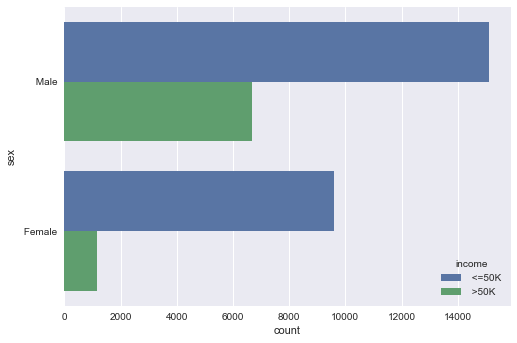

In [13]:
#frequências de cada classe, em relação ao alvo do nosso classificador
# usando a sexo
sns.countplot(y='sex', hue='income', data=data,)

In [14]:
age = data['age'].value_counts('Male,')
age

36    0.027579
31    0.027272
34    0.027210
23    0.026934
35    0.026903
        ...   
83    0.000184
85    0.000092
88    0.000092
86    0.000031
87    0.000031
Name: age, Length: 73, dtype: float64

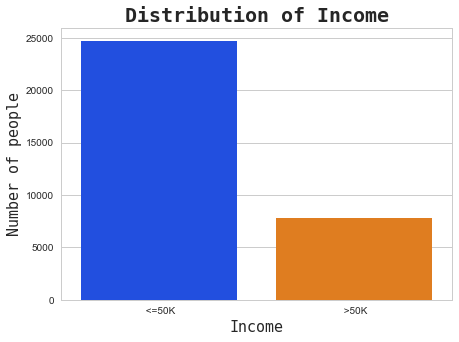

In [15]:
income = data['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

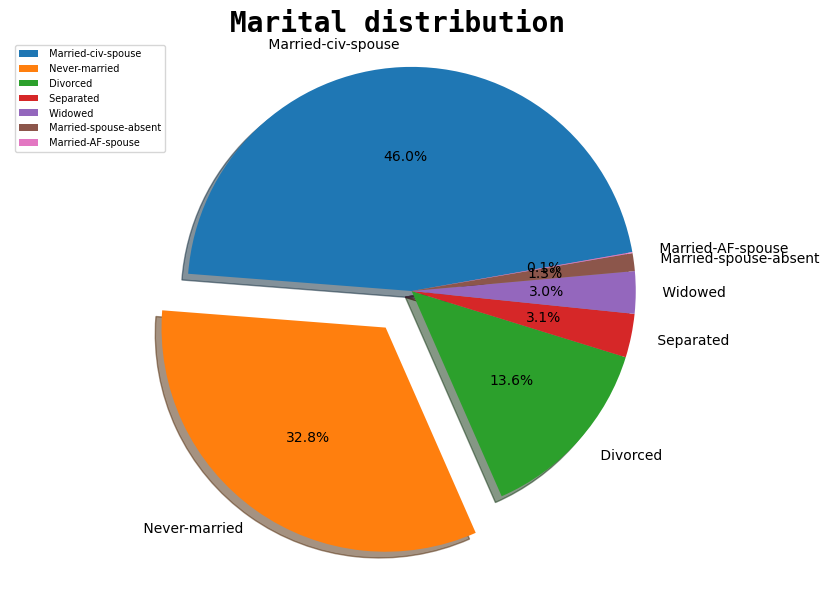

In [16]:
# Creating a pie chart for 'Marital status'
marital = data['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

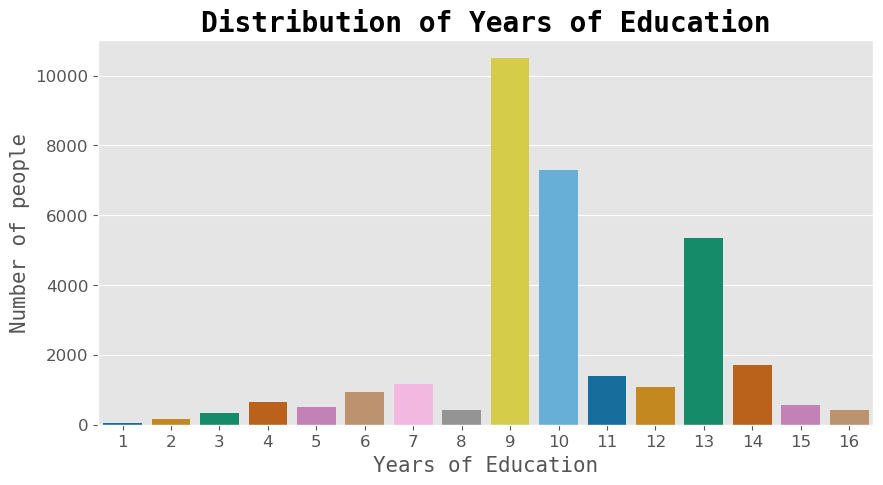

In [17]:
edu_num = data['education.num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

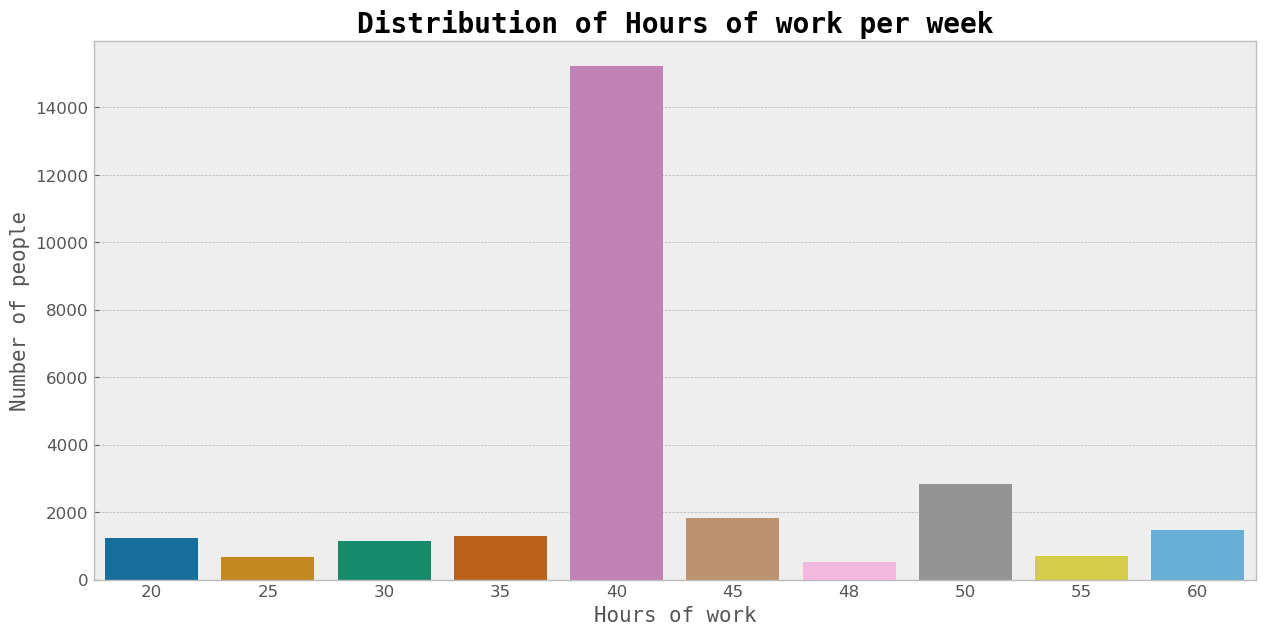

In [18]:
hours = data['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

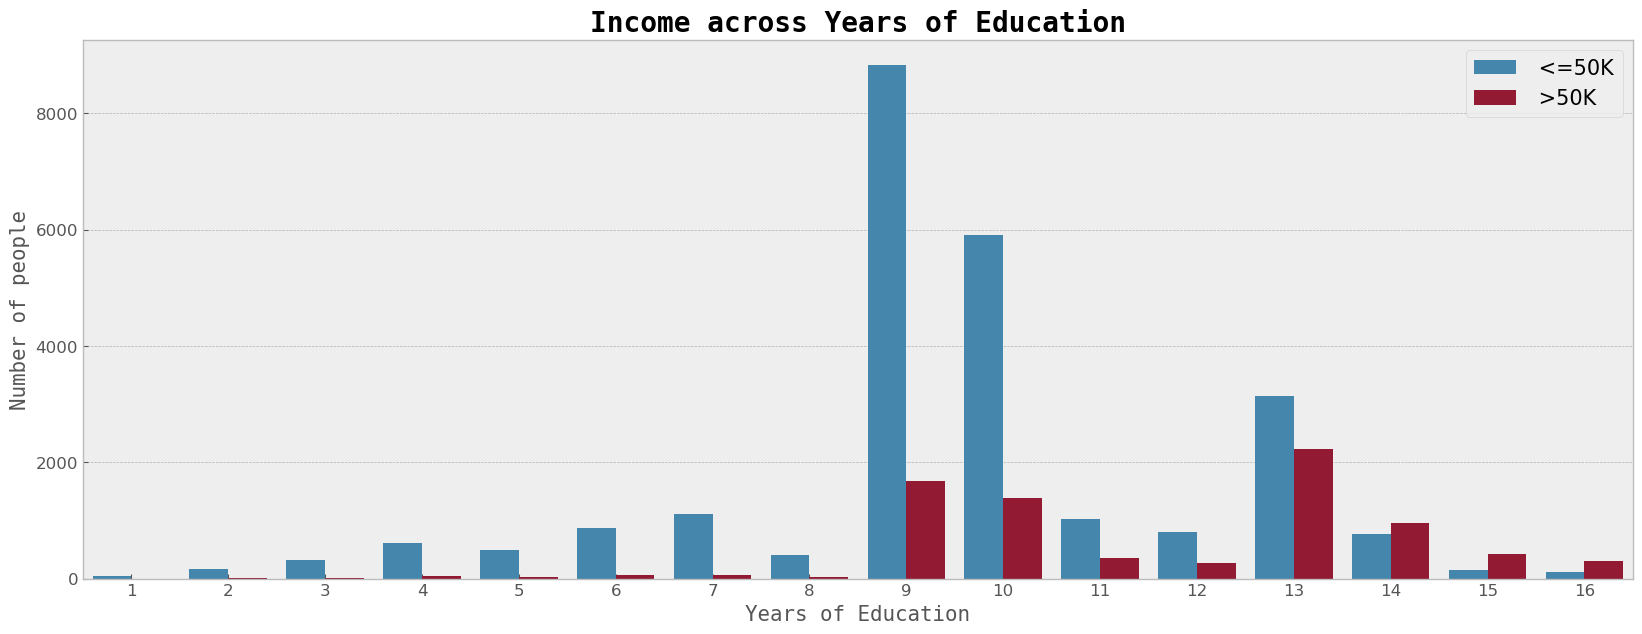

In [19]:
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(data['education.num'],
              hue=data['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

## Processamento de dados

In [54]:
# Removendo valores ?
dataset = data.replace('?', np.nan)

In [55]:
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [56]:
# Condificando dados (Label Encoding)
from sklearn.preprocessing import LabelEncoder

In [57]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

In [61]:
# Selecionando Feature
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [64]:
"""
Esta classe implementa um metaestimador que ajusta um número de árvores de decisão aleatórias
(também conhecidas como árvores extras)em várias subamostras do conjunto de dados e usa a média
para melhorar a precisão preditiva e o sobreajuste de controle.
"""

from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [65]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [66]:
feature_imp = selector.feature_importances_

In [67]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.38
1 4.48
2 16.51
3 3.56
4 9.04
5 7.38
6 7.53
7 9.25
8 1.47
9 2.76
10 8.76
11 2.77
12 9.36
13 1.75


In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [70]:
X = X.drop(['workclass', 'education', 'race', 'sex','capital.loss', 'native.country'], axis=1)

In [71]:
"""
dimensionamento de recursos é um método usado para normalizar o intervalo de variáveis independentes
ou recursos de dados. No processamento de dados, também é conhecida como normalização de dados e geralmente
é executada durante a etapa de pré-processamento de dados.
"""
from sklearn.preprocessing import StandardScaler

In [72]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [73]:
# Correção de conjunto de dados desequilibrado usando Oversampling
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [74]:
!pip install imblearn

In [75]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [76]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [77]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [78]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

###### Creating a train test split

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [82]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


## Modelo 

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dec_tree = DecisionTreeClassifier(random_state=42)
random_tree = DecisionTreeClassifier(random_state=0, splitter="random")
#dec_tree = DecisionTreeClassifier(random_state=10, criterion='entropy')
#dec_tree = DecisionTreeClassifier(random_state=20, criterion='entropy')

In [86]:
# Decicion Tree
dec_tree.fit(X_train, Y_train)
#a = dec_tree.fit(X_train, Y_train)

# Random Tree
random_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0, splitter='random')

In [87]:
Y_pred_dec_tree = dec_tree.predict(X_test)
Y_pred_random_tree = random_tree.predict(X_test)

In [88]:
#dir(random_tree)

## Avaliação de modelo

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [91]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2)) # Medida de precisão

Decision Tree Classifier:
Accuracy score: 91.02
F1 score: 91.53


In [94]:
print('Random Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_random_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_random_tree) * 100, 2)) # Medida de precisão

Random Tree Classifier:
Accuracy score: 90.85
F1 score: 91.34


In [95]:
from sklearn.tree import export_text
"""
Também podemos obter uma representação textual da árvore usando a função export_tree da biblioteca Sklearn
"""

'\nTambém podemos obter uma representação textual da árvore usando a função export_tree da biblioteca Sklearn\n'

In [96]:
r = export_text(random_tree, feature_names=list(X.columns))
print(r)

|--- marital.status <= 0.58
|   |--- marital.status <= -1.47
|   |   |--- capital.gain <= 3.10
|   |   |   |--- capital.gain <= 1.54
|   |   |   |   |--- capital.gain <= 1.26
|   |   |   |   |   |--- education.num <= -0.18
|   |   |   |   |   |   |--- capital.gain <= 0.23
|   |   |   |   |   |   |   |--- hours.per.week <= 3.84
|   |   |   |   |   |   |   |   |--- hours.per.week <= 0.60
|   |   |   |   |   |   |   |   |   |--- age <= -0.69
|   |   |   |   |   |   |   |   |   |   |--- occupation <= -0.37
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- occupation >  -0.37
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  -0.69
|   |   |   |   |   |   |   |   |   |   |--- age <= 0.97
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 21
|   |   |   |   |   |   |   |   |   |   |--- age >  0.97
|   |   |   |   |   |   |   |   |   |   |   |-

In [52]:
!pip install graphviz

In [50]:
!pip install pydotplus

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [60]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus
import graphviz
import os

"""
dot_data = StringIO()
export_graphviz(Y_pred_dec_tree, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,feature_names = names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())
"""
dot_data = StringIO() 
export_graphviz(a, out_file=dot_data, filled=True, rounded=True, special_characters=True)
#feature_names = names,class_names=['0','1']
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('tree.pdf')
#Image(graph.create_png())

True

In [ ]:
# https://graphviz.org/download/

In [ ]:
# Salvar Regras